## Basic Classification

## Exercice 1

In [2]:
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

## Exercice 2

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Exercice 3

In [4]:
print(tf.__version__)

2.4.1


## Exercice 4

In [5]:
data = keras.datasets.cifar10
cifar10_data = data.load_data()

170500096/170498071 [==============================] - 6s 0us/step


## Exercice 5

In [6]:
print(type(cifar10_data))
len(cifar10_data)

<class 'tuple'>


2

## Exercice 6

In [7]:
(train_images, train_labels),(test_images, test_labels) = cifar10_data

## Exercice 7

In [8]:
print(train_images[0])
print(train_images[0].shape)

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(32, 32, 3)


In [9]:
class_name = [ 'airplane ' , 'automobile ' , 'bird ' , 'cat ' , 'deer '
, 'dog ' , 'frog ' , 'horse ' , 'ship ' , 'truck ']

## Exercice 8

In [10]:
print(len(class_name))
print(len(train_images))
print(class_name[0])

10
50000
airplane 


## Exercice 9

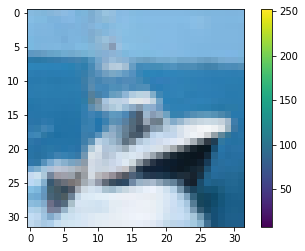

array([8], dtype=uint8)

In [11]:
index = 8
plt.figure()
plt.imshow(train_images[index])
plt.colorbar()
plt.grid(False)
plt.show()

train_labels[index]

## Exercice 10

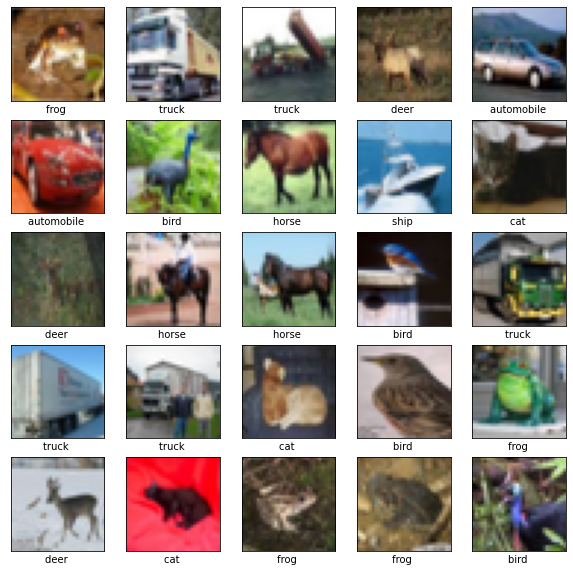

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_name[int(train_labels[i])])
plt.show()

## Exercice 11

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Exercice 12

The First layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a two-dimensional array (of 32 by 32 pixels) to a one-dimensional array (of 32 x 32 = 1024 pixels).

After the pixels are attened, the network consists of a sequence of two tf.keras.layers.Dense layers.

The First Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer that returns an array of 10 probability scores that sum to 1.

In [14]:
model = keras.Sequential([
            keras.layers.Flatten(input_shape =(32 , 32, 3)),
            keras.layers.Dense(128, activation ='relu'),
            keras.layers.Dense(10, activation ='softmax')])

## Exercice 13

 * Loss function :This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
 * Optimizer :This is how the model is updated based on the data it sees and its loss function.
 * Metrics :Used to monitor the training and testing steps. The follow- ing example uses accuracy, the fraction of the images that are correctly classifed. 

## Exercice 14

In [16]:
model.compile(optimizer ='adam',
              loss ='sparse_categorical_crossentropy',
              metrics =['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs =10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0677 - accuracy: 0.2470
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8572 - accuracy: 0.3275
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8123 - accuracy: 0.3441
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7970 - accuracy: 0.3527
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7872 - accuracy: 0.3620
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7728 - accuracy: 0.3665
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7541 - accuracy: 0.3695
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7502 - accuracy: 0.3724
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7418 - accuracy: 0.3745
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.719

## Exercice 15

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose =2)

313/313 - 0s - loss: 1.7236 - accuracy: 0.3738


## Exercice 16

first element : cat 


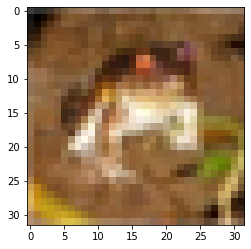

In [19]:
predictions = model.predict(test_images)
plt.imshow(train_images[0])
print('first element :', class_name[np.argmax(predictions[0])]) 

second element : automobile 


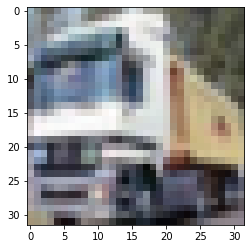

In [20]:
plt.imshow(train_images[1])
print('second element :', class_name[np.argmax(predictions[1])])

second element : ship 


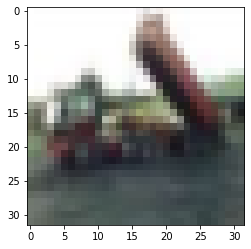

In [21]:
plt.imshow(train_images[2])
print('second element :', class_name[np.argmax(predictions[2])])

No prediction is correct...

## Exercice 17

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  true_label = true_label[0]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)  
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)

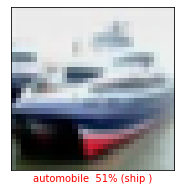

In [23]:
i = 1
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], test_labels, test_images)
plt.show()

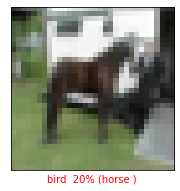

In [24]:
i = 20
plt.figure(figsize=(6,3))
plot_image(i, predictions[i], test_labels, test_images)
plt.show()

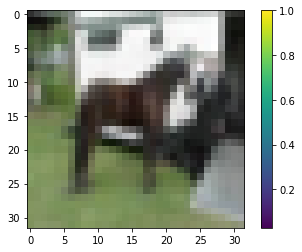

'horse '

In [25]:
plt.figure()
plt.imshow(test_images[20])
plt.colorbar()
plt.grid(False)
plt.show()
class_name[int(test_labels[20])]

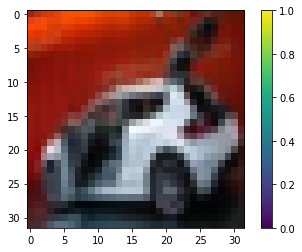

'automobile '

In [26]:
plt.figure()
plt.imshow(test_images[6])
plt.colorbar()
plt.grid(False)
plt.show()
class_name[int(test_labels[6])]

In [27]:
correct = 0
for i in range(len(predictions)):
  if np.argmax(predictions[i]) == test_labels[i]:
    correct = correct + 1

true_predictions_percentage = correct/len(predictions)
print(true_predictions_percentage)

0.3738
